# Language Detection

Download the Dataset from https://www.kaggle.com/datasets/basilb2s/language-detection


In [2]:
import re
import csv
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

## Read Dataset

In [3]:
# Loading the dataset
data = pd.read_csv("./data/Language_Detection.csv")
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [6]:
# Loading the update dataset
import codecs

# pd.read_csv("Language_Detection_Update.csv", sep='\t', engine='python')
with codecs.open("./data/Language_Detection_Update.csv", 'r', encoding='utf-8', errors='ignore') as df:
    df = pd.read_csv(
        df, delimiter=",", 
        quoting=csv.QUOTE_NONE, encoding='utf-8'
    )

df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,"""விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்தி...",Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [18]:
def compare_count_plot(data, column, title):
    # data[column].value_counts()
    type_list = data[column].value_counts().index

    # set font
    sns.set(font_scale=2)
    sns.set(rc={'figure.figsize': (12, 8)})

    # plot bar graph
    ax = sns.countplot(y=column, data=data, order=type_list)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()

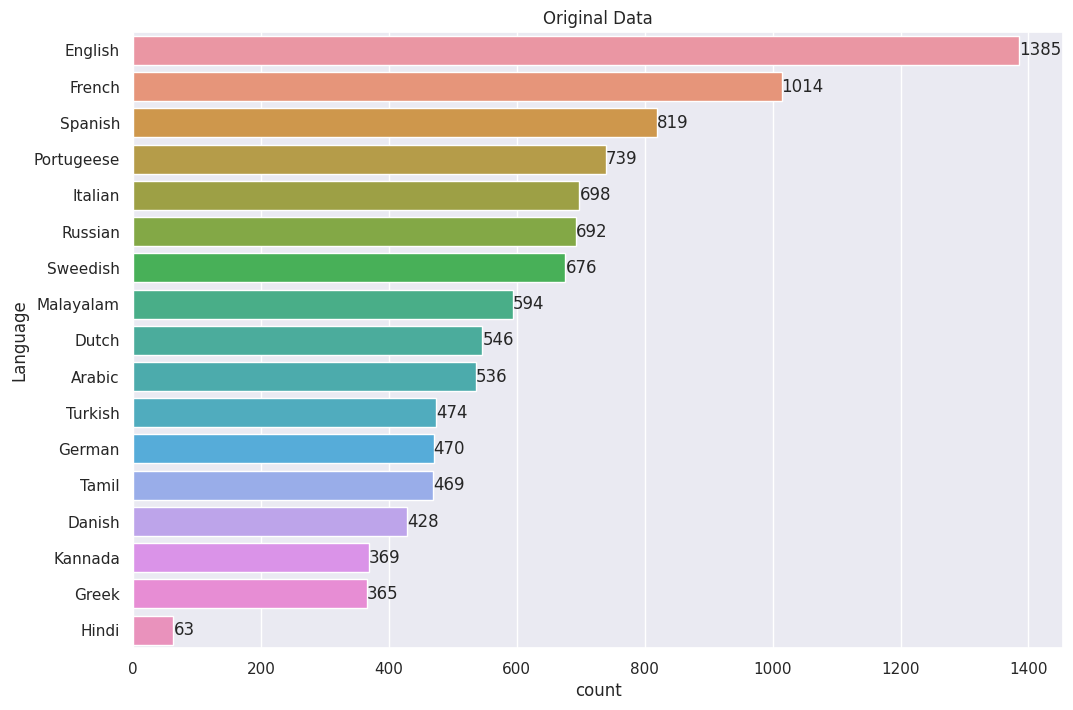

In [19]:
compare_count_plot(data, "Language", "Original Data")

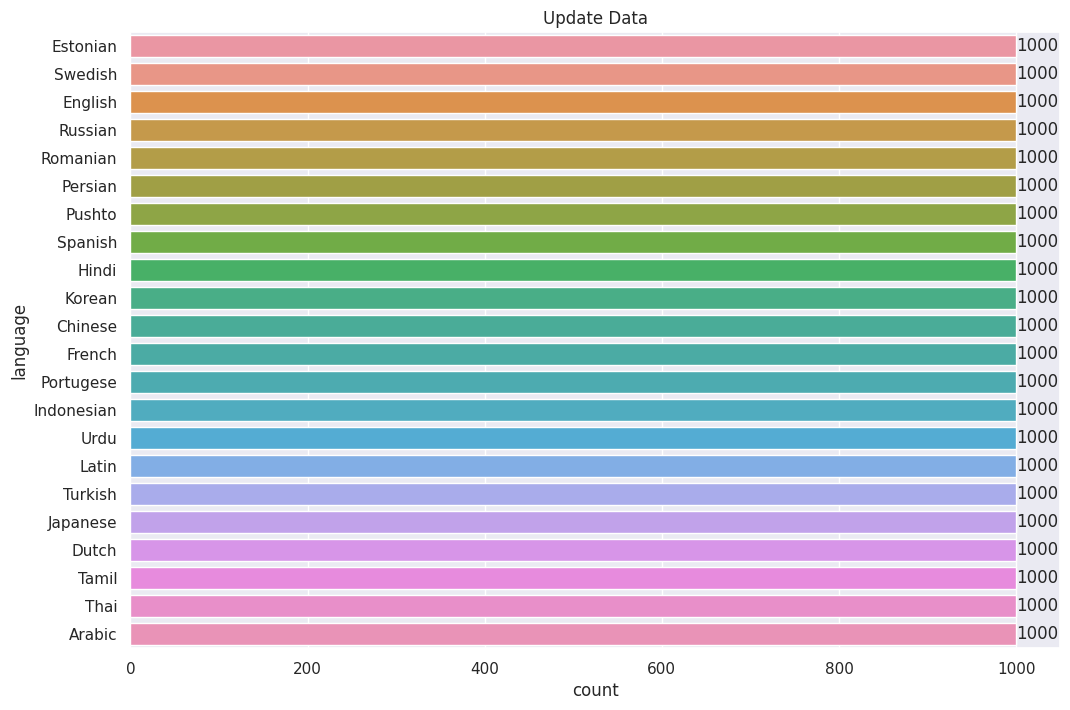

In [20]:
compare_count_plot(df, "language", "Update Data")

In [10]:
x = df["Text"]
y = df["language"]

## Encode Data

In [11]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y = LE.fit_transform(y)

In [12]:
LE.classes_

array(['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French',
       'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian',
       'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish',
       'Tamil', 'Thai', 'Turkish', 'Urdu'], dtype=object)

In [13]:
data_list = []
for text in x:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_list, y, test_size=0.20, random_state=2020
)

## Creating bag of words using countvectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
CV.fit(X_train)

x_train = CV.transform(X_train).toarray()
x_test  = CV.transform(X_test).toarray()

In [16]:
x_train[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Train Detection Model

In [17]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

## Evaluation Model

In [21]:
y_pred = model.predict(x_test) 

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy is {100 * accuracy:.2f}%")

Accuracy is 94.48%


## Model Pipeline

In [25]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('vectorizer', CV), ('multinomialNB', model)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('multinomialNB', MultinomialNB())])

In [26]:
y_pred2 = pipe.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy is {100 * accuracy:.2f}%")

Accuracy is 94.48%


## Inference with model

In [27]:
with open('./model/detection_model.pkl','wb') as f:
    pickle.dump(pipe, f)

In [ ]:
text = "สวัสดีครับผม"
y = pipe.predict([text])
LE.classes_[y[0]], y

('Thai', array([19]))

In [28]:
text = "Hello, how are you?"
y = pipe.predict([text])
LE.classes_[y[0]], y

('English', array([3]))

In [29]:
print(f"Prediction: {LE.classes_[y[0]]}")

Prediction: English
